In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
# load data about chipset factory
data = pd.read_csv('../../data/microchip_tests.txt',
header=None, names = ('test1','test2','released'))
# информация о наборе данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test1       118 non-null float64
test2       118 non-null float64
released    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [3]:
data.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
data.tail()

,test1,test2,released
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


In [5]:
# Сохраним обучающую выборку и метки целевого класса в отдельных массивах NumPy. 

X = data.ix[:,:2].values
y = data.ix[:,2].values

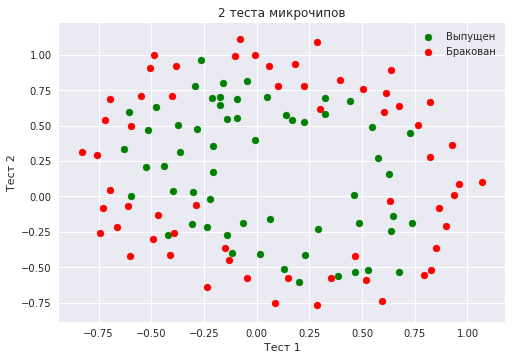

In [6]:
# Отобразим данные. Красный цвет соответствует бракованным чипам, зеленый – нормальным.

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов')
plt.legend();

In [7]:
# Определяем функцию для отображения разделяющей кривой классификатора

def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, grid_step),
        np.arange(y_min, y_max, grid_step)
    )

    # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

Доля правильных ответов классификатора на обучающей выборке: 0.627


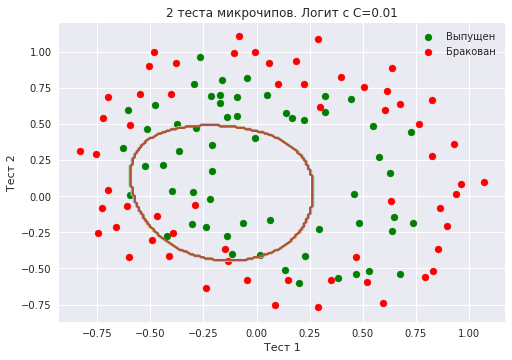

In [13]:
# Создадим объект sklearn, который добавит в матрицу X полиномиальные признаки вплоть до степени 7 
# и обучим логистическую регрессию с параметром регуляризации C=10−2. 

poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

C = 1e-2
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=0.01')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
round(logit.score(X_poly, y), 3))

Доля правильных ответов классификатора на обучающей выборке: 0.831


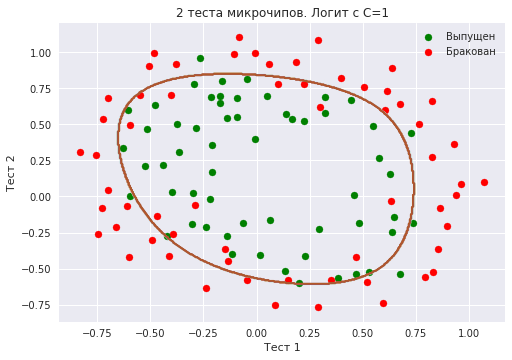

In [9]:
# Увеличим C до 1. 
# Тем самым мы ослабляем регуляризацию, 
# теперь в решении значения весов логистической регрессии могут оказаться больше (по модулю), чем в прошлом случае

C = 1
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=1')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
round(logit.score(X_poly, y), 3))

Доля правильных ответов классификатора на обучающей выборке: 0.873


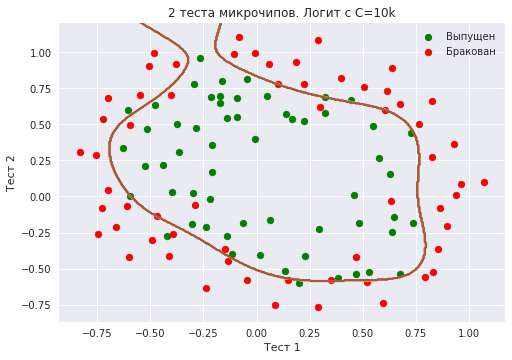

In [10]:
# Еще увеличим C – до 10 тысяч. 
# Теперь регуляризации явно недостаточно, и мы наблюдаем переобучение.

C = 1e4
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=10k')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
round(logit.score(X_poly, y), 3))

*Промежуточные выводы*
 - чем больше параметр C, тем более сложные зависимости в данных может восстанавливать модель (интуитивно C соответствует "сложности" модели (model capacity))
 - если регуляризация слишком сильная (малые значения C), то решением задачи минимизации логистической функции потерь может оказаться то, когда многие веса занулились или стали слишком малыми. Еще говорят, что модель недостаточно "штрафуется" за ошибки (то есть в функционале J "перевешивает" сумма квадратов весов, а ошибка L может быть относительно большой). В таком случае модель окажется недообученной (1 случай)
 - наоборот, если регуляризация слишком слабая (большие значения C), то решением задачи оптимизации может стать вектор w с большими по модулю компонентами. В таком случае больший вклад в оптимизируемый функционал J имеет L и, вольно выражаясь, модель слишком "боится" ошибиться на объектах обучающей выборки, поэтому окажется переобученной (3 случай)
 - то, какое значение C выбрать, сама логистическая регрессия "не поймет" (или еще говорят "не выучит"), то есть это не может быть определено решением оптимизационной задачи, которой является логистическая регрессия (в отличие от весов w). Так же точно, дерево решений не может "само понять", какое ограничение на глубину выбрать (за один процесс обучения). Поэтому C – это гиперпараметр модели, который настраивается на кросс-валидации, как и max_depth для дерева.

In [15]:
# Теперь найдем оптимальное (в данном примере) значение параметра регуляризации C. 
# Сделать это можно с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. 

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 500)

logit_searcher = LogisticRegressionCV(Cs=c_values, cv=skf, verbose=1, n_jobs=-1)
logit_searcher.fit(X_poly, y);



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.1s finished


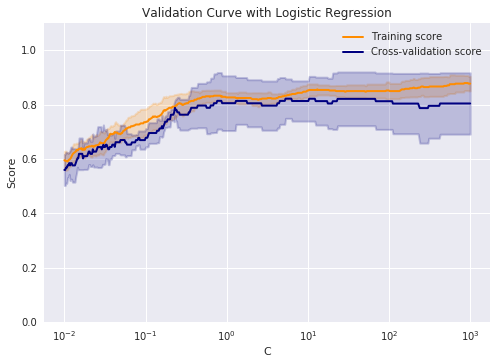

In [27]:
# try to plot vlidation curve

from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    LogisticRegression(), 
    X_poly, y, 
    param_name="C", 
    param_range=c_values,
    cv=skf, 
    scoring="accuracy", 
    n_jobs=-1
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Logistic Regression")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(c_values, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(c_values, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(c_values, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(c_values, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# XOR-проблема

In [30]:
# порождаем данные
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [35]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(
        Z, 
        interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect='auto', 
        origin='lower', 
        cmap=plt.cm.PuOr_r
    )
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
#     plt.xlabel(r'$<!-- math><img src="https://habrastorage.org/getpro/habr/post_images/736/3ed/315/7363ed3150ecffdf235171aaa9ea4160.svg" alt="$x_1$" data-tex="inline" /></math -->$')
#     plt.ylabel(r'$<!-- math><img src="https://habrastorage.org/getpro/habr/post_images/911/1e6/994/9111e69946e97ffe28324cbae67a9269.svg" alt="$x_2$" data-tex="inline" /></math -->$')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

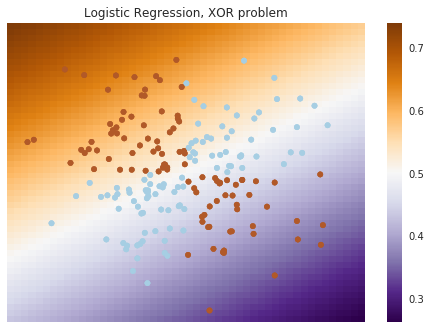

In [36]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);
plot_boundary(LogisticRegression(), X, y, "Logistic Regression, XOR problem")

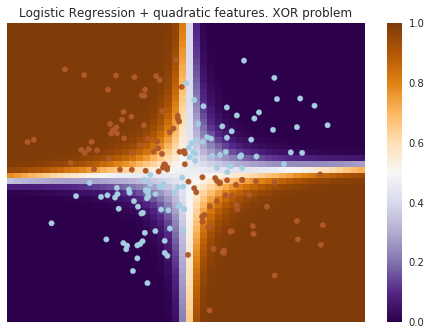

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), ('logit', LogisticRegression())])
plot_boundary(logit_pipe, X, y, "Logistic Regression + quadratic features. XOR problem")